In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import holidays

In [3]:
#Customer Churn

In [4]:
# Load the cleaned dataset
data = pd.read_csv("C:/Users/15132/OneDrive/Desktop/final_project/project_4/cleaned.csv")

# Preview the dataset
data.head()

,Customer_ID,Gender,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Average_Price,...,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_Percentage,Near_Holiday,State,Total_Sales,Total_Cost,Average_Saved($)
0,17850.0,M,12.0,16679.0,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371
1,17850.0,M,12.0,16680.0,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371
2,17850.0,M,12.0,16696.0,1/1/2019,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest Smart Devices,2.0,122.77,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,245.54,227.486,12.277
3,17850.0,M,12.0,16699.0,1/1/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest Smart Devices,1.0,81.50,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,81.50,79.850,8.150
4,17850.0,M,12.0,16700.0,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371


In [5]:
# Convert 'Transaction_Date' to datetime
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

In [6]:
# Filter data for the year 2019
data_2019 = data[(data['Transaction_Date'] >= '2019-01-01') & (data['Transaction_Date'] <= '2019-12-31')]

In [7]:
# Initialize a list to hold churn data
churn_data = []

In [8]:
# Generate a date range for the year 2019
date_range = pd.date_range(start='2019-01-01', end='2019-12-31')

for date in date_range:
    total_customers = data_2019[data_2019['Transaction_Date'] <= date]['Customer_ID'].nunique()
    churned_customers = data_2019[(data_2019['Transaction_Date'] < (date - pd.Timedelta(days=90))) & 
                                   (data_2019['Transaction_Date'] <= date)]['Customer_ID'].nunique()
    
    # Calculate churn rate
    if total_customers > 0:
        churn_rate = (churned_customers / total_customers) * 100
    else:
        churn_rate = 0  
    
    churn_data.append({'Date': date, 'Churn_Rate': churn_rate})


In [9]:
# Print percentage of churned customers vs total customers
print(f"Date: {date.date()}, Total Customers: {total_customers}, Churned Customers: {churned_customers}, Churn Rate: {churn_rate:.2f}%")


Date: 2019-12-31, Total Customers: 1469, Churned Customers: 1208, Churn Rate: 82.23%


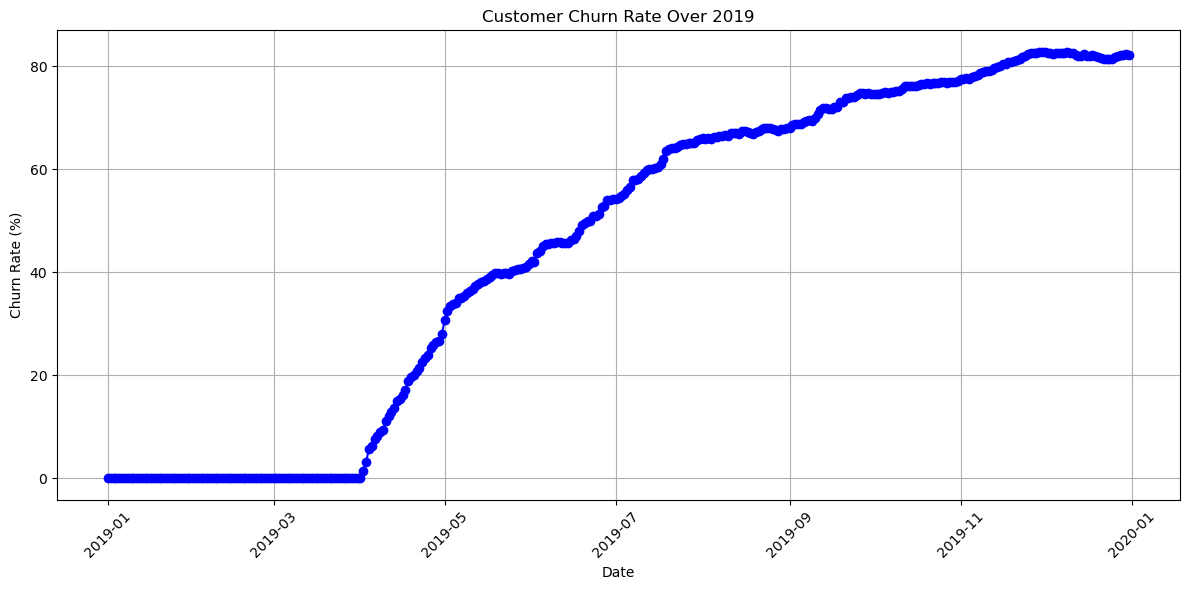

In [10]:
#Plot churn rates
churn_df = pd.DataFrame(churn_data)

plt.figure(figsize=(12, 6))
plt.plot(churn_df['Date'], churn_df['Churn_Rate'], marker='o', color='b')
plt.title('Customer Churn Rate Over 2019')
plt.xlabel('Date')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [11]:
#Goods and Services Tax (GST) - What items are being taxed the most? $$ and frequency wise

In [12]:
# Calculate total GST collected for each transaction
data['Total_GST'] = data['GST'] * data['Total_Sales']

In [13]:
# Group by product description and aggregate total GST and frequency
gst_summary = data.groupby('Product_Description').agg(
    Total_GST_Collected=('Total_GST', 'sum'),
    Frequency=('Product_Description', 'count')
).reset_index()

In [14]:
# Sort by total GST collected and frequency
gst_summary_sorted = gst_summary.sort_values(by='Total_GST_Collected', ascending=False)

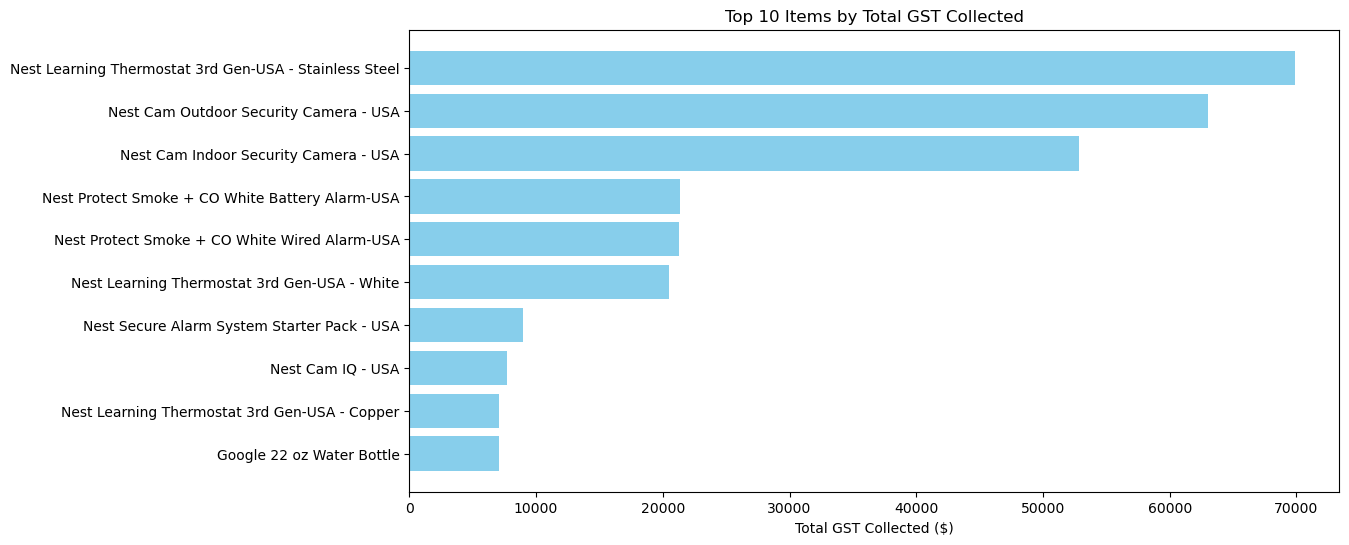

In [15]:
# Plotting the top 10 items by total GST collected
top_items = gst_summary_sorted.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_items['Product_Description'], top_items['Total_GST_Collected'], color='skyblue')
plt.xlabel('Total GST Collected ($)')
plt.title('Top 10 Items by Total GST Collected')
plt.gca().invert_yaxis()  
plt.show()

In [16]:
#What has cost the most to deliver over the past year?

In [17]:
# Group by product and sum delivery charges for the entire period
delivery_costs = data.groupby('Product_Description')['Delivery_Charges'].sum().reset_index()

In [18]:
# Sort by total delivery cost
delivery_costs_sorted = delivery_costs.sort_values(by='Delivery_Charges', ascending=False)

In [19]:
# Display the top 10 items with highest delivery costs
top_delivery_costs = delivery_costs_sorted.head(10)
print(top_delivery_costs)

                                   Product_Description  Delivery_Charges
316  Nest Learning Thermostat 3rd Gen-USA - Stainle...      25282.736542
312             Nest Cam Outdoor Security Camera - USA      24321.090000
212                                  Google Sunglasses      23855.880000
310              Nest Cam Indoor Security Camera - USA      22983.410000
101                          Google 22 oz Water Bottle      12116.420000
140              Google Laptop and Cell Phone Stickers      10063.250000
321    Nest Protect Smoke + CO White Battery Alarm-USA       9259.780000
317       Nest Learning Thermostat 3rd Gen-USA - White       7703.820000
323      Nest Protect Smoke + CO White Wired Alarm-USA       7477.530000
192                       Google Metallic Notebook Set       7143.750000


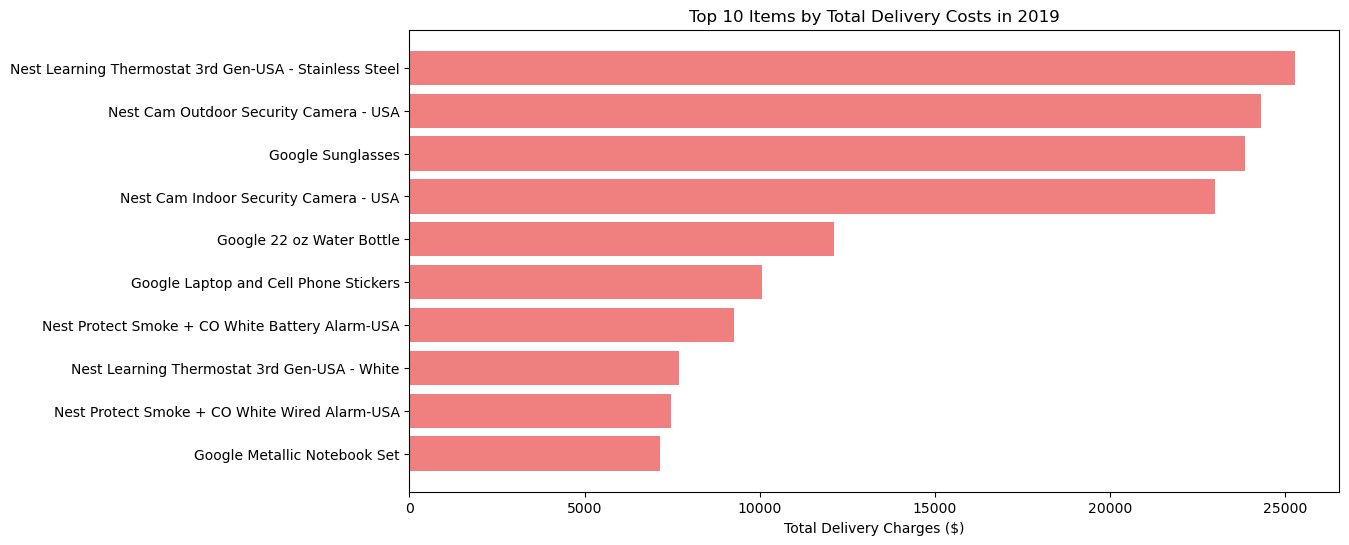

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(top_delivery_costs['Product_Description'], top_delivery_costs['Delivery_Charges'], color='lightcoral')
plt.xlabel('Total Delivery Charges ($)')
plt.title('Top 10 Items by Total Delivery Costs in 2019')
plt.gca().invert_yaxis() 
plt.show()

In [37]:
#What is ordered most frequently around what holidays?

In [38]:
# Get US holidays for the year of your interest
us_holidays = holidays.US(years=2019)

In [39]:
# Create a set of holiday names to filter by
holiday_names = set(us_holidays.values())

In [ ]:
# Count the frequency of orders by holiday
holiday_counts = data.groupby(['Coupon_Status', 'Product_Description']).agg({'Quantity': 'sum'}).reset_index()


In [41]:
# Filter for holidays - keep only those that are in the holiday names
holiday_counts = holiday_counts[holiday_counts['Coupon_Status'].isin(holiday_names)]

In [49]:
# Check if your holiday names are in the dataset
print("Defined holidays:", holiday_names)

Defined holidays: {'Martin Luther King Jr. Day', 'Christmas Day', 'Independence Day', 'Columbus Day', 'Memorial Day', 'Labor Day', 'Veterans Day', "Washington's Birthday", 'Thanksgiving', "New Year's Day"}


In [52]:
# Pivot the table for better visualization
pivot_counts = holiday_counts.pivot(index='Product_Description', columns='Coupon_Status', values='Quantity').fillna(0)

In [51]:
# Sort products by the total quantity ordered across holidays
pivot_counts['Total'] = pivot_counts.sum(axis=1)
pivot_counts = pivot_counts.sort_values(by='Total', ascending=False)

In [53]:
# Display the top 10 products ordered around holidays
top_holiday_orders = pivot_counts.head(10)

In [59]:
# Check the final DataFrame before plotting
[top_holiday_orders]

[Coupon_Status                            Clicked  Not Used    Used
 Product_Description                                               
 1 oz Hand Sanitizer                       1054.0     324.0  1056.0
 20 oz Stainless Steel Insulated Tumbler    307.0      18.0    67.0
 22 oz Android Bottle                       610.0     123.0   277.0
 22 oz YouTube Bottle Infuser               401.0     135.0   544.0
 23 oz Wide Mouth Sport Bottle              329.0      61.0    63.0
 24 oz YouTube Sergeant Stripe Bottle       466.0      71.0   242.0
 25L Classic Rucksack                        53.0      13.0    21.0
 26 oz Double Wall Insulated Bottle         756.0     307.0   504.0
 7&quot; Dog Frisbee                        352.0     216.0   199.0
 8 pc Android Sticker Sheet                1285.0     318.0   479.0]

C:\Users\15132\AppData\Local\Temp\ipykernel_28932\3613728224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_holiday_orders['Total'] = top_holiday_orders.sum(axis=1)


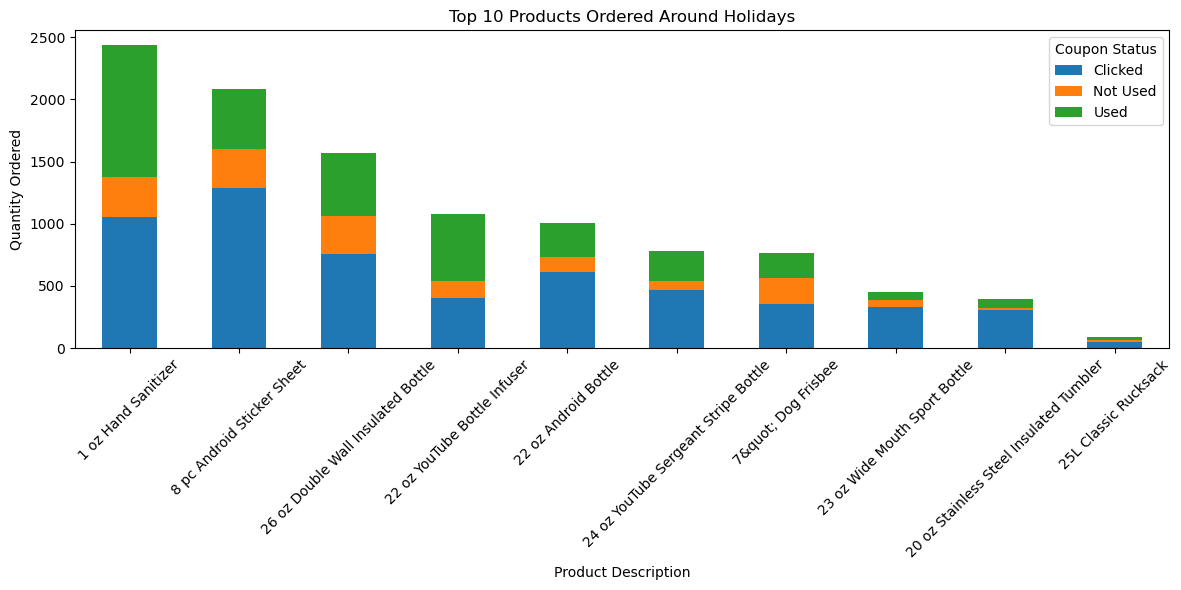

In [61]:
# Calculate the total quantity for each product
top_holiday_orders['Total'] = top_holiday_orders.sum(axis=1)

# Sort the DataFrame in descending order based on the total quantity
top_holiday_orders = top_holiday_orders.sort_values(by='Total', ascending=False)

# Plotting the results
top_holiday_orders.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Top 10 Products Ordered Around Holidays')
plt.xlabel('Product Description')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.legend(title='Coupon Status')
plt.tight_layout()
plt.show()

In [62]:
# Create a holiday mapping based on transaction dates
def get_holiday(transaction_date):
    for holiday in us_holidays.items():
        if transaction_date.date() == holiday[0]:
            return holiday[1]  
    return None

In [63]:
# Apply the function to create a new column 'Holiday'
data['Holiday'] = data['Transaction_Date'].apply(get_holiday)

In [64]:
# Filter for rows where 'Holiday' is not None
holiday_orders = data[data['Holiday'].notnull()]

In [65]:
# Group by Holiday and Product Description to get total quantities
holiday_counts = holiday_orders.groupby(['Holiday', 'Product_Description']).agg({'Quantity': 'sum'}).reset_index()


In [67]:
# Pivot the table for better visualization
pivot_holiday_counts = holiday_counts.pivot(index='Product_Description', columns='Holiday', values='Quantity').fillna(0)


In [68]:
# Sort by total quantity ordered across all holidays
pivot_holiday_counts['Total'] = pivot_holiday_counts.sum(axis=1)
pivot_holiday_counts = pivot_holiday_counts.sort_values(by='Total', ascending=False)


In [69]:
# Sort by total quantity ordered across all holidays
pivot_holiday_counts['Total'] = pivot_holiday_counts.sum(axis=1)
pivot_holiday_counts = pivot_holiday_counts.sort_values(by='Total', ascending=False)

In [70]:
# Display the top products for each holiday
top_holiday_products = pivot_holiday_counts.head(10)

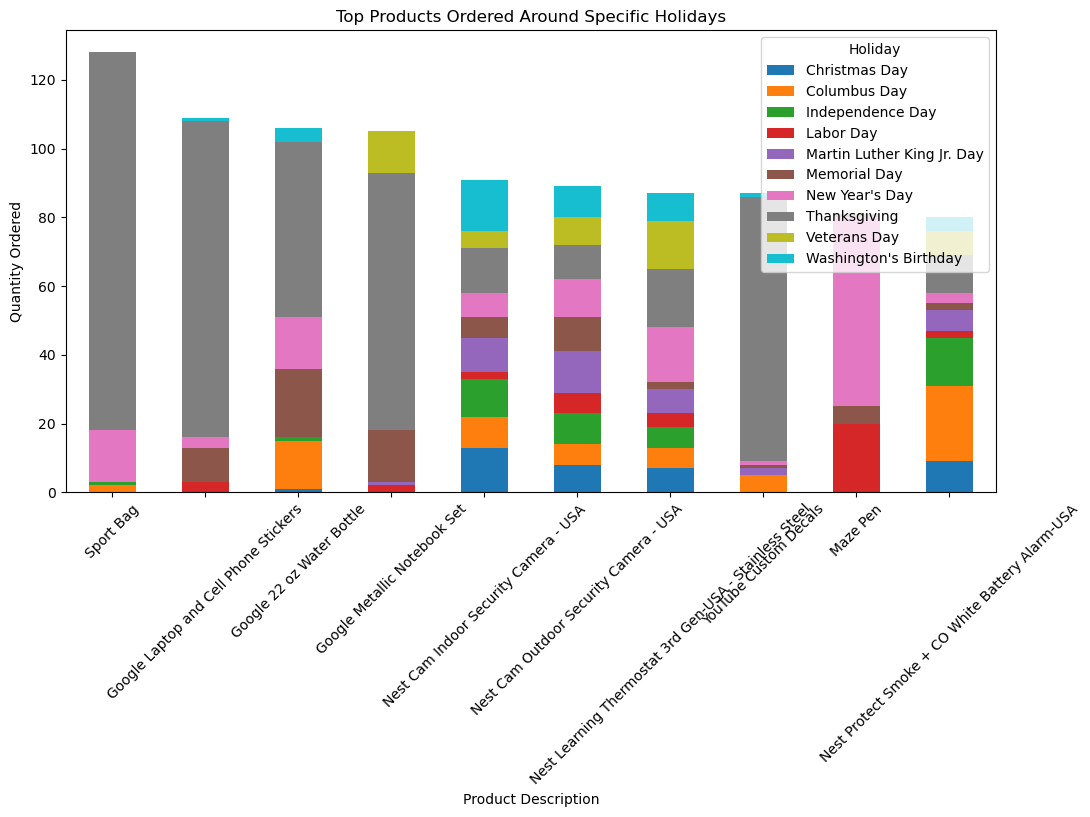

In [75]:
# Plotting the results
top_holiday_products.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Top Products Ordered Around Specific Holidays')
plt.xlabel('Product Description')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.legend(title='Holiday', loc='upper right')
plt.show()

In [ ]:
#How much is an individual likely to spend? What are they most likely to order? What quantity?

In [76]:
# Step 1: Calculate total spend per individual
# Group by Product_Description and sum Total_Sales
total_spend = data.groupby('Product_Description')['Total_Sales'].sum().reset_index()
average_spend = total_spend['Total_Sales'].mean()

In [77]:
# Step 2: Identify most likely orders
most_ordered_products = data.groupby('Product_Description')['Quantity'].sum().reset_index()
most_ordered_products = most_ordered_products.sort_values(by='Quantity', ascending=False)

In [78]:
# Step 3: Calculate average quantity ordered for the most likely product
most_frequent_product = most_ordered_products.iloc[0]['Product_Description']
average_quantity = data[data['Product_Description'] == most_frequent_product]['Quantity'].mean()


In [88]:
# Display results
print(f"Amount a customer is likely to spend per year: ${average_spend:.2f}")
print(f"Most likely product to order: {most_frequent_product}")
print(f"Average quantity ordered per year: {average_quantity:.2f}")

Amount a customer is likely to spend per year: $11579.40
Most likely product to order: Maze Pen
Average quantity ordered per year: 43.41


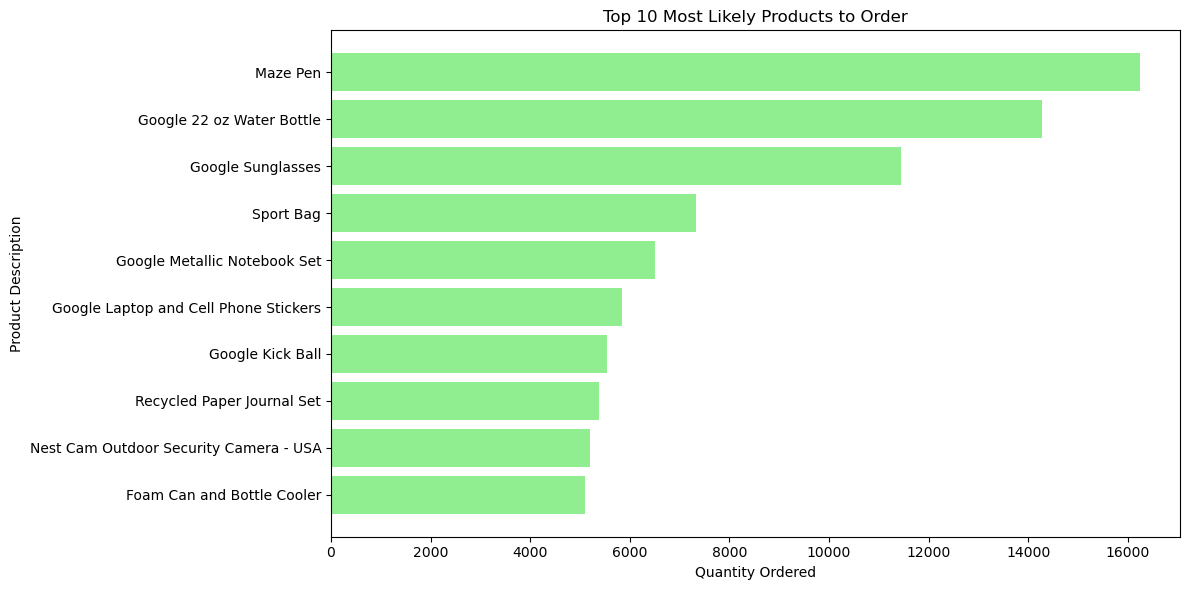

In [84]:
# Step 2: Bar Chart for Most Likely Product Orders
top_products = most_ordered_products.head(10)  # Get top 10 products
plt.figure(figsize=(12, 6))
plt.barh(top_products['Product_Description'], top_products['Quantity'], color='lightgreen')
plt.title('Top 10 Most Likely Products to Order')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product Description')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [99]:
#weighted average quantity per gender

In [100]:
# Calculate total sales for each gender (to use as weights for the weighted average)
gender_sales = data.groupby('Gender')['Total_Sales'].sum()

In [101]:
#Define the function to calculate the weighted quantity
def calculate_weighted_quantity(group):
    return (group['Quantity'] * group['Total_Sales']).sum()

In [102]:
# Calculate the weighted sum of quantities per gender
weighted_quantity = data.groupby('Gender').apply(calculate_weighted_quantity)

C:\Users\15132\AppData\Local\Temp\ipykernel_28932\1016280723.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_quantity = data.groupby('Gender').apply(calculate_weighted_quantity)


In [103]:
#calculate the weighted average by dividing the weighted sum of quantities by the total sales (weights)
weighted_avg_quantity = weighted_quantity / gender_sales

In [104]:
# Display the weighted average quantity per gender
print(weighted_avg_quantity)

Gender
F    22.708259
M    23.300158
dtype: float64


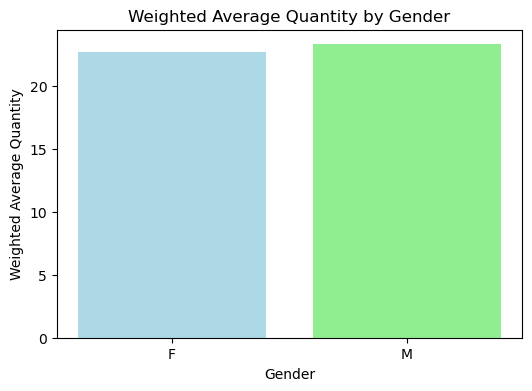

In [109]:
# Plotting the bar chart

gender = weighted_avg_quantity.index  
average_quantity = weighted_avg_quantity.values


plt.figure(figsize=(6, 4))
plt.bar(gender, average_quantity, color=['lightblue', 'lightgreen'])
plt.title('Weighted Average Quantity by Gender')
plt.xlabel('Gender')
plt.ylabel('Weighted Average Quantity')
plt.show()